In [1]:
import os
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:

# Initialisiere den SimpleBlobDetector mit benutzerdefinierten Parametern
params = cv2.SimpleBlobDetector_Params()
# Filtere nach Kreisen, die helle Bereiche auf dunklem Hintergrund darstellen
params.filterByColor = True
params.blobColor = 255
# Filtere nach Kreisen die mind. eine Fläche von minArea umschließen
# Setze die Mindest- und Höchstdurchmesser der Kreise (Radius * 2)
params.filterByArea = True
min_diameter = 2000  # Mindestdurchmesser
max_diameter = 10000  # Maximaldurchmesser
params.minArea = np.pi * (min_diameter / 2) ** 2  # Mindestfläche basierend auf dem Mindestdurchmesser
params.maxArea = np.pi * (max_diameter / 2) ** 2  # Maximale Fläche basierend auf dem Maximaldurchmesser

detector = cv2.SimpleBlobDetector_create(params)

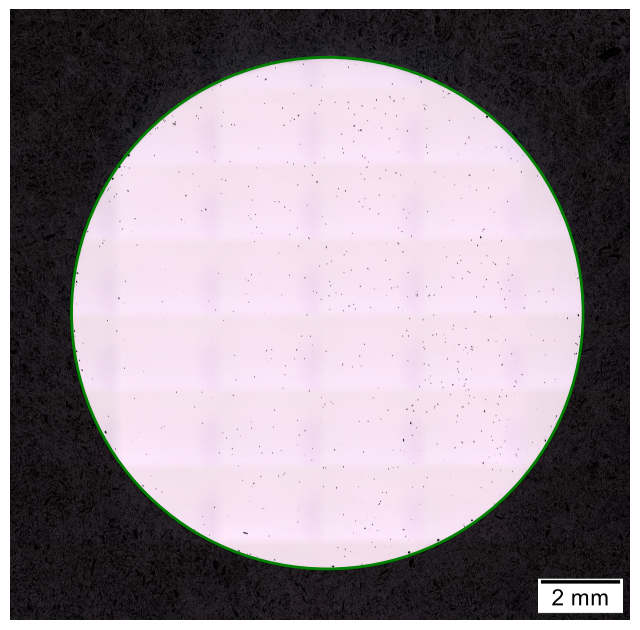

1


In [7]:
path = "Bildervorbearbeitung/Bilder"

for image in os.listdir(path):
    if not image.endswith('rund.png'):
        continue
    image_path = os.path.join(path, image)
    image = cv2.imread(image_path)
    # Konvertiere das Bild in Graustufen
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Erkenne die Kreise im Bild
    keypoints = detector.detect(gray)

    # Extrahiere die Koordinaten und Radien der erkannten Kreise
    circles = []
    for keypoint in keypoints:
        x = int(keypoint.pt[0])  # x-Koordinate des Kreises
        y = int(keypoint.pt[1])  # y-Koordinate des Kreises
        radius = int(keypoint.size / 2)  # Radius des Kreises
        circles.append((x, y, radius))
    
    # Zeige das Bild mit Matplotlib und den erkannten Kreisen
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    for circle in circles:
        x, y, radius = circle
        circle_obj = plt.Circle((x, y), radius, color='green', fill=False, linewidth=2)
        plt.gca().add_patch(circle_obj)
    plt.axis('off')
    plt.show()
    print(len(keypoints), radius)
